In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

## Data Grouping And Visualization

In [8]:
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

<Axes: ylabel='count'>

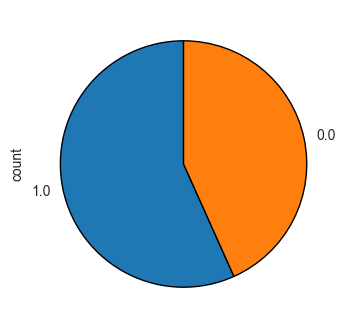

In [9]:
df['Churn'].value_counts().plot(kind='pie', figsize=(4,4),startangle=90, wedgeprops={'linewidth':1, "edgecolor":'black'})

In [10]:
df.groupby('Age')['Usage Frequency'].mean()

Age
18.0    15.753620
19.0    15.774557
20.0    15.788548
21.0    15.735011
22.0    15.948542
23.0    15.841375
24.0    15.841310
25.0    15.833731
26.0    15.783430
27.0    15.842272
28.0    15.951603
29.0    15.929474
30.0    15.669112
31.0    15.815002
32.0    15.795407
33.0    15.843767
34.0    15.867578
35.0    15.825167
36.0    15.828302
37.0    15.960541
38.0    15.889903
39.0    15.801387
40.0    15.966739
41.0    15.841887
42.0    15.939975
43.0    15.924215
44.0    15.801523
45.0    15.865879
46.0    15.789942
47.0    15.890533
48.0    16.056305
49.0    15.893277
50.0    16.129223
51.0    15.633254
52.0    15.648210
53.0    15.395281
54.0    15.606725
55.0    15.461468
56.0    15.587183
57.0    15.829323
58.0    15.525405
59.0    15.650458
60.0    15.583057
61.0    15.441465
62.0    15.430408
63.0    15.361331
64.0    15.613719
65.0    15.450000
Name: Usage Frequency, dtype: float64

In [11]:
df.groupby('Gender')['Usage Frequency'].mean()

Gender
Female    15.729001
Male      15.867270
Name: Usage Frequency, dtype: float64

In [12]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

<Axes: xlabel='Subscription Type'>

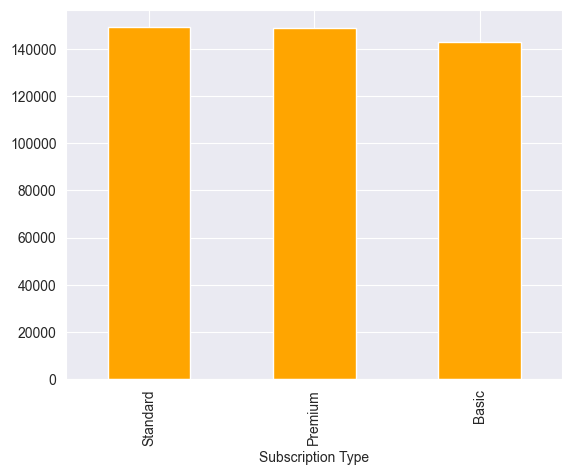

In [13]:
df['Subscription Type'].value_counts().plot(kind='bar', color='orange')

<Axes: xlabel='Age', ylabel='Count'>

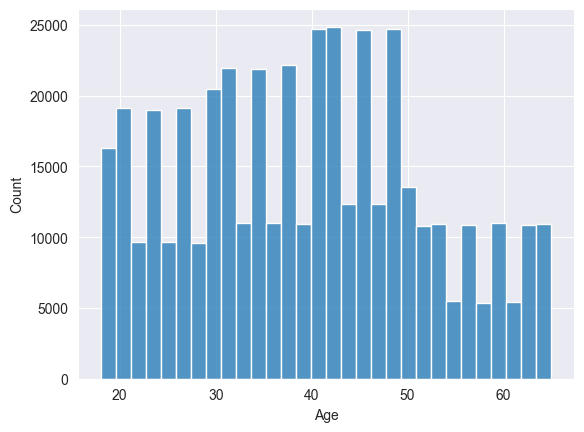

In [14]:
sns.histplot(df['Age'], bins=30)

In [15]:
df.groupby('Subscription Type')['Total Spend'].sum()

Subscription Type
Basic       89916655.39
Premium     94102240.69
Standard    94417746.64
Name: Total Spend, dtype: float64

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24520\2543328867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Type', y='Total Spend', data=df, palette='Set3')


Text(0.5, 1.0, 'Total Spend by Subscription Type')

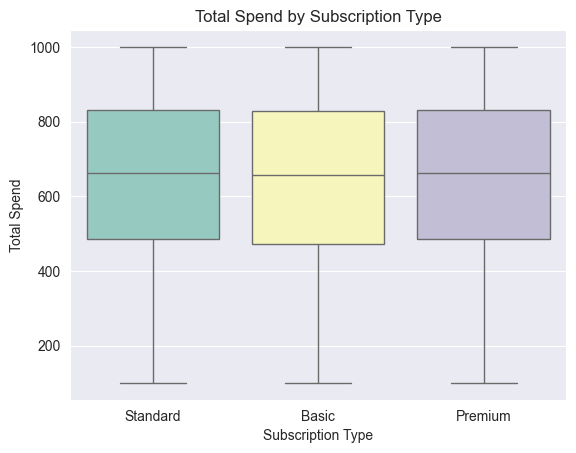

In [16]:
sns.boxplot(x='Subscription Type', y='Total Spend', data=df, palette='Set3')
plt.title('Total Spend by Subscription Type')

<Axes: xlabel='Tenure', ylabel='Total Spend'>

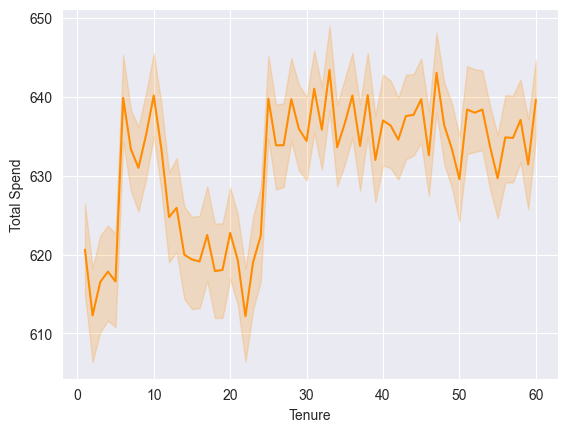

In [17]:
sns.lineplot(x='Tenure', y='Total Spend', data=df, color='darkorange')

<Axes: xlabel='Total Spend', ylabel='Age'>

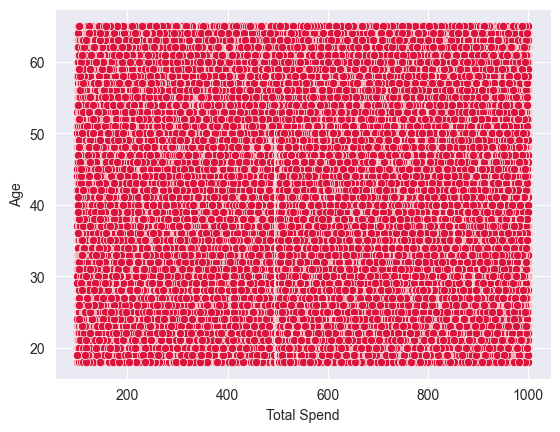

In [18]:
sns.scatterplot(x='Total Spend', y='Age', data=df, color='crimson')

<Axes: >

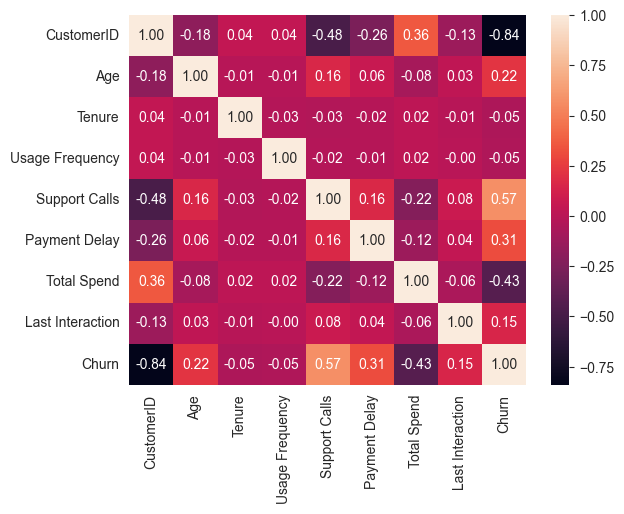

In [19]:
df_numeric = df.drop(columns=['Gender', 'Subscription Type', 'Contract Length'])
corr = df_numeric.corr()

sns.heatmap(corr, annot=True, fmt='.2f')

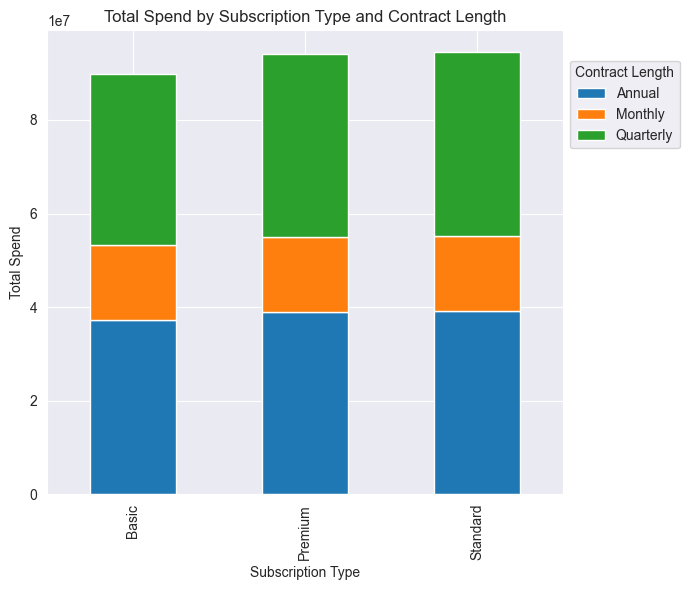

In [20]:
grouped_df = df.groupby(['Subscription Type', 'Contract Length'])['Total Spend'].sum().unstack()

grouped_df.plot(kind='bar', stacked=True, figsize=(7, 6))
plt.title('Total Spend by Subscription Type and Contract Length')
plt.xlabel('Subscription Type')
plt.ylabel('Total Spend')
plt.legend(title='Contract Length', loc="upper left", bbox_to_anchor=(1, 0.95), ncol=1)
plt.tight_layout()
plt.show()

## Model Creation, Training and Evaluation

In [21]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [23]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
df['Contract Length'] = le.fit_transform(df['Contract Length'])

In [24]:
X = df[['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend']]
y = df['Churn']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000), 
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
          'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}, "
        f"Precision: {precision_score(y_test, y_pred):.2f}, "
        f"Recall: {recall_score(y_test, y_pred):.2f}, "
        f"F1-Score: {f1_score(y_test, y_pred):.2f}")

Logistic Regression - Accuracy: 0.85, Precision: 0.88, Recall: 0.85, F1-Score: 0.86
Random Forest - Accuracy: 0.99, Precision: 1.00, Recall: 0.98, F1-Score: 0.99


C:\Users\gpiska\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:59:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.99, Precision: 1.00, Recall: 0.98, F1-Score: 0.99
